## Customer Segmentation Using KMeans Algorithm
### Author: Vedant Deshmukh

### Importing all the needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

### Loading the Dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/vedant27102001/Customer-Segmentation-of-Mall-Customers-Dataset/main/Mall_Customers_Dataset.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.rename(columns={'Genre' : 'Gender'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Getting the Shape of Data 

In [4]:
df.shape

(200, 5)

### Finding some basic insights of the Data

In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

### Checking for Null Values and Handling them

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Therefore, there are no null values present in the data. 

### Droping the Unwanted Columns

In [8]:
df.drop(["CustomerID"], axis=1, inplace = True)

### Plotting Distribution Plot for Age, Annual Income and Spending Score

c:\users\123\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\123\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\123\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

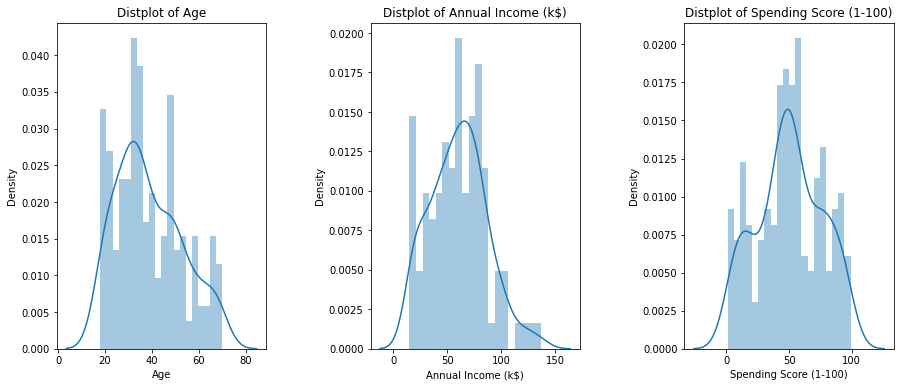

In [9]:
plt.figure(1,figsize=(15,6))
n=0
for x in ['Age','Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

<b>Observations:</b>
<ul>
<li> The people of around 30 years old have the maximum density by Age.
    <li> The people of around 60-70 years old have the maximum density Annual Income.
        <li> The people of around 50 years old have the maximum density by Spending Score.


</ul>


### Comparision Based on Gender of People

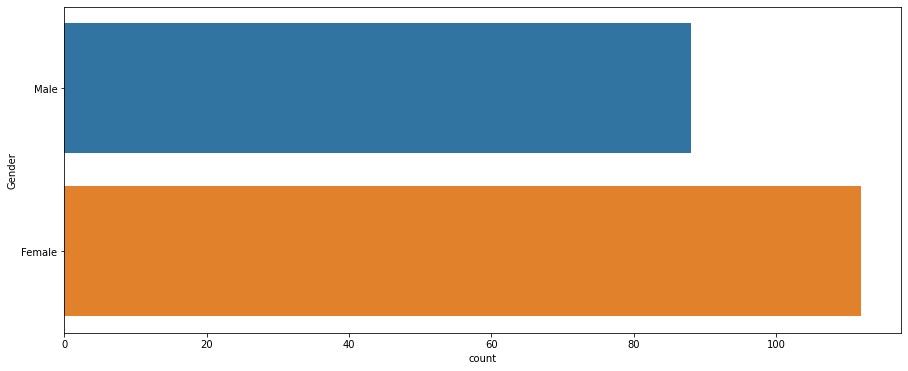

In [10]:
plt.figure(figsize=(15,6))
sns.countplot(y='Gender', data=df)
plt.show()

There are more number of females than males in our dataset.

### Plotting Age, Annual Income and Spending Score  based on Gender 

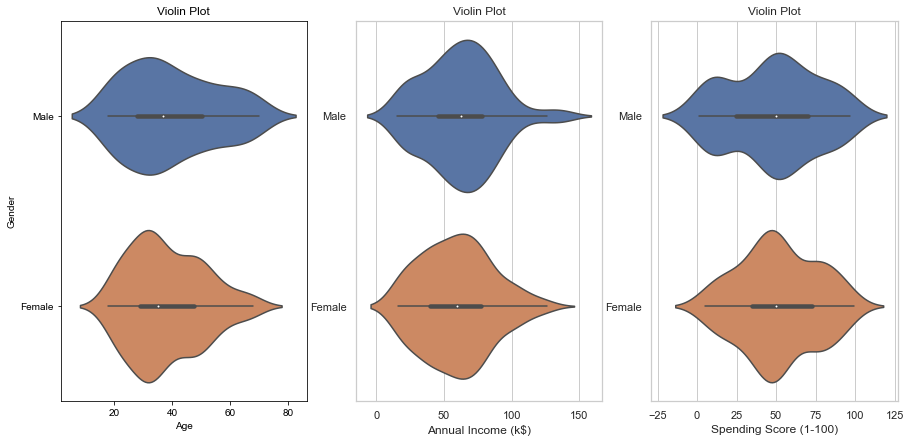

In [11]:
plt.figure (1, figsize=(15,7))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style = "whitegrid")
    sns.violinplot(x=cols, y='Gender',data = df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')
plt.show()

 We can conclude that the density of females is more than males at around 30 years old based on Age criteria. 
<br><br>
On the basis of Annual Income and Spending Score, we have pretty similar amount of density in both genders at ages of around 60-70 years old and of around 50 years old respectively.

### Categorizing the Data in Age Groups for better Visualization

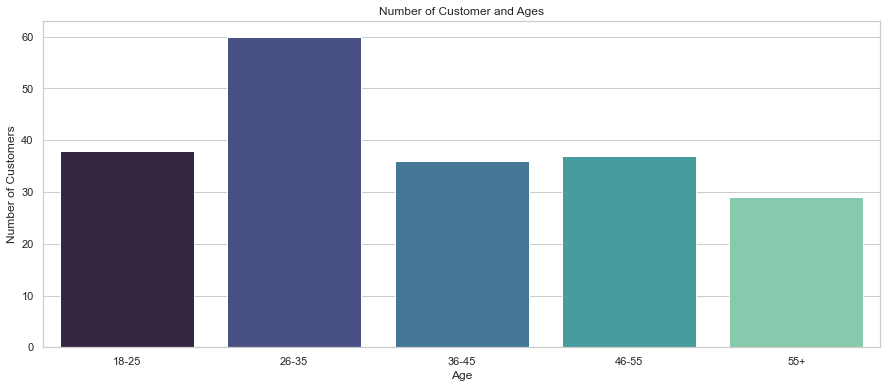

In [12]:
age_18_25 =  df.Age[(df.Age >= 18) & (df.Age <=25)]
age_26_35 =  df.Age[(df.Age >= 26) & (df.Age <=35)]
age_36_45 =  df.Age[(df.Age >= 36) & (df.Age <=45)]
age_46_55 =  df.Age[(df.Age >= 46) & (df.Age <=55)]
age_55above = df.Age[(df.Age >= 56)]

agex =["18-25", "26-35", "36-45", "46-55", "55+"]
agey =  [len(age_18_25.values), len(age_26_35.values),len(age_36_45.values), len(age_46_55.values),len(age_55above.values)]
plt.figure(figsize= (15,6))
sns.barplot(x=agex, y=agey, palette =  "mako")
plt.title ("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

The Hioghest number of population is aged between 26-35 years old.

### Relationship between Annual Income and Spending Score

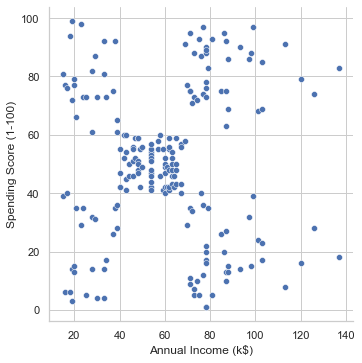

In [13]:
sns.relplot(x="Annual Income (k$)", y="Spending Score (1-100)", data=df)


There is some relationship between Annual Income and Spending Score between the range in whih Spending Score lies between 40-60.

### Categorizing Spending Score in Different Groupa

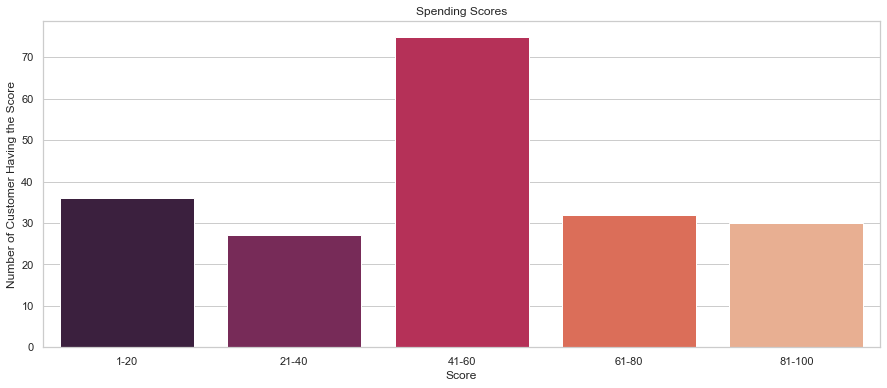

In [14]:
ss_1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=1) & (df["Spending Score (1-100)"] <=20)]
ss_21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=21) & (df["Spending Score (1-100)"] <=40)]
ss_41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=41) & (df["Spending Score (1-100)"] <=60)]
ss_61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=61) & (df["Spending Score (1-100)"] <=80)]
ss_81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"]>=81) & (df["Spending Score (1-100)"] <=100)]

ssx = ["1-20","21-40","41-60", "61-80", "81-100"]
ssy = [len(ss_1_20.values), len(ss_21_40.values),len(ss_41_60.values), len(ss_61_80.values),len(ss_81_100.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette ="rocket")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

The maximum number of customers have Spending Score of 40-60.

### Categorizing Annual Income in Different Groups

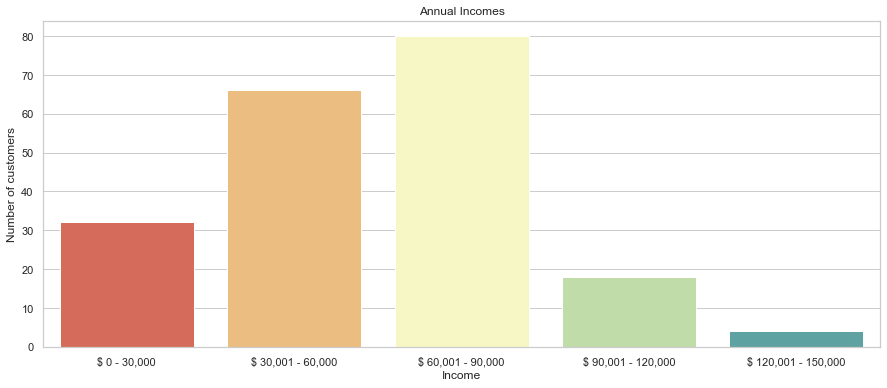

In [15]:
ai0_30=df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) &  (df["Annual Income (k$)"] <= 30)]
ai31_60=df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) &  (df["Annual Income (k$)"] <= 60)]
ai61_90=df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) &  (df["Annual Income (k$)"] <= 90)]
ai91_120=df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) &  (df["Annual Income (k$)"] <= 120)]
ai121_150=df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) &  (df["Annual Income (k$)"] <= 150)]

aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette ="Spectral")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of customers")
plt.show()

Most of the Customers have income of 60,000 - 90,000 Dollars

### Finding Optimal No. of Clusters using WCSS method

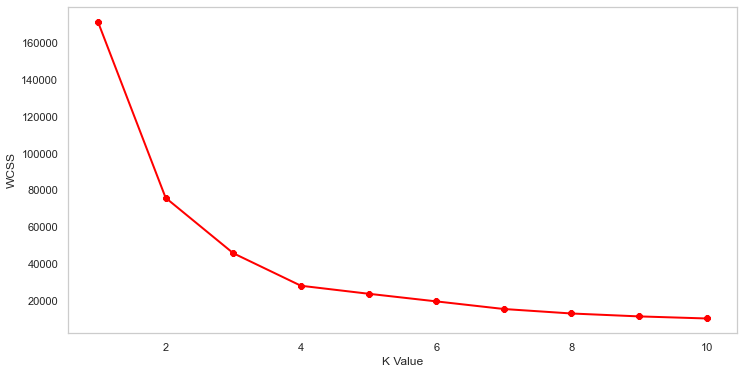

In [16]:
X1 =  df.loc[:, ["Age", "Spending Score (1-100)"]].values
from sklea rn.cluster import KMeans
wcss = []`
for k in range(1,11):
    kmeans = KMeans(n_clusters = k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = "red", marker ="8")
plt.xlabel("K Value")
plt.ylabel ("WCSS")
plt.show()

We can see that no. of optimal clusters are 4.

### KMeans Algorithm

In [17]:
kmeaaans = KMeans(n_clusters = 4)
label =  kmeans.fit_predict(X1)
print(label)

[2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 2 2 3 1 2 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3
 1 3 1 0 1 0 2 3 2 0 2 2 2 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 2 0 0 2 2 0 0 0 0
 0 2 0 2 2 0 0 2 0 0 2 0 0 2 2 0 0 2 0 2 2 2 0 2 0 2 2 0 0 2 0 2 0 0 0 0 0
 2 2 2 2 2 0 0 0 0 2 2 2 1 2 1 0 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 0 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 2
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [18]:
print(kmeans.cluster_centers_)

[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [27.61702128 49.14893617]
 [43.29166667 15.02083333]]


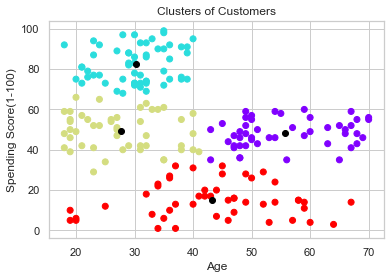

In [19]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color ='black')
plt.title('Clusters of Customers')
plt.xlabel('Age')
plt.ylabel('Spending Score(1-100)')
plt.show()

Here we can see the 4 clusters and their respective centeroids.

### KMeans Algrorithm on Considering all Columns

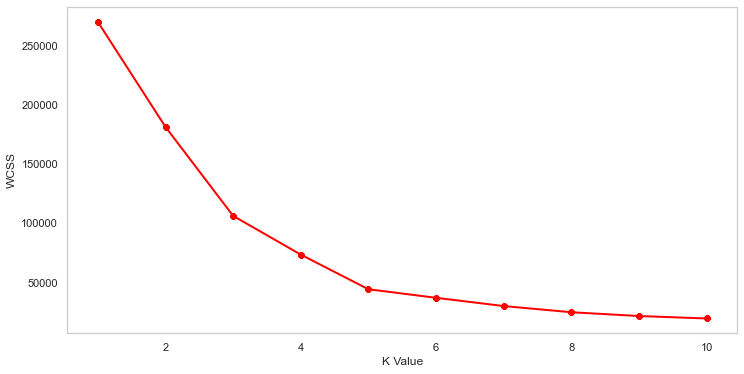

In [20]:
X2 =  df.loc[:, ["Annual Income (k$)", "Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss = []
    kmeans = KMeans(n_clusters = k, init="k-means++")
    kmeans.fit(X2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6))
plt.grid()
plt.plot(range(1,11), wcss, linewidth = 2, color = "red", marker ="8")
plt.xlabel("K Value")
plt.ylabel ("WCSS")
plt.show()

The Number of Optimum Clusters is 5.

In [21]:
kmeans = KMeans(n_clusters = 5)
label =  kmeans.fit_predict(X2)
print(label)

[4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 2 4 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 2 1 3 1 3 1 3 1 3 1 2 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [22]:
print(kmeans.cluster_centers_)

[[25.72727273 79.36363636]
 [86.53846154 82.12820513]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [26.30434783 20.91304348]]


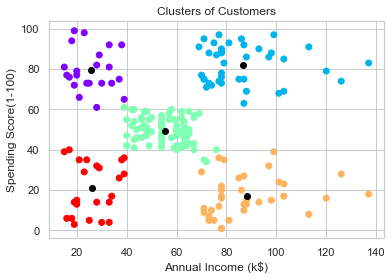

In [23]:
plt.scatter(X2[:,0], X1[:,1], c=kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], color ='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

The data is being divided in 5 differentt cultures. They also have the centeroids.

### KMeans Algrorithm on Annual Income and Spending Score

X3 = df.iloc[:, 1:]
wcss = []
for k in range(1,11):
    kmeans = KMeans (n_clusters = k, init = "k-means++")
    kmeans.fit(X3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize = (12,6)) 
plt.grid()
plt.plot(range(1,11), wcss, linewidth =  2, color ='red', marker = "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


In [25]:
kmeans = KMeans (n_clusters = 5)
label = kmeans.fit_predict(X3)
print(label)

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 1 2 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 4 0 1 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 1 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [26]:
print(kmeans.cluster_centers_)

[[32.69230769 86.53846154 82.12820513]
 [42.9375     55.0875     49.7125    ]
 [45.2173913  26.30434783 20.91304348]
 [25.27272727 25.72727273 79.36363636]
 [40.66666667 87.75       17.58333333]]


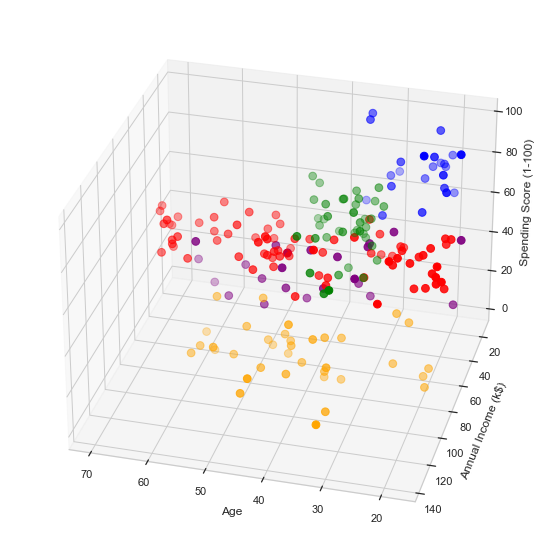

In [27]:
clusters =  kmeans.fit_predict(X3)
df["label"] =  clusters

from mpl_toolkits.mplot3d import Axes3D

fig =  plt.figure(figsize = (20,10))
ax =  fig.add_subplot(111, projection ='3d')
ax.scatter(df.Age[df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df.Age[df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df.Age[df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df.Age[df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df.Age[df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30,105)

plt.xlabel ("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()


We can see 3D Respresentation of clusters based on three variables in the Dataset. Each Cluster is created with a different colour.